In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
df = pd.read_csv('scorepred.csv')
df

,HOURS,SCORES
0,5.1,47
1,3.2,27
2,8.5,75
3,3.5,30
4,1.5,20
5,9.2,88
6,5.5,60
7,8.3,81
8,2.7,25
9,7.7,85


In [3]:
df.describe()

,HOURS,SCORES
count,24.000000,24.000000
mean,5.116667,52.750000
std,2.523398,25.003043
min,1.100000,17.000000
25%,3.075000,30.000000
50%,4.950000,50.500000
75%,7.475000,75.250000
max,9.200000,95.000000


In [4]:
df.isnull()

,HOURS,SCORES
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


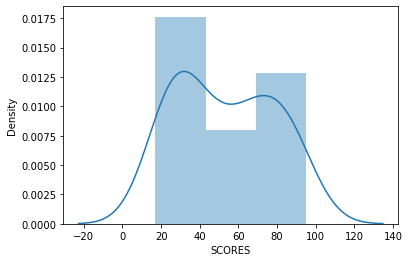

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


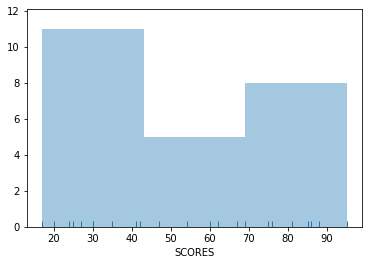

In [6]:
sns.distplot(df["SCORES"])
plt.show()

sns.distplot(df["SCORES"], kde=False, rug=True)
plt.show()


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'JointGrid' object has no attribute 'annotate'

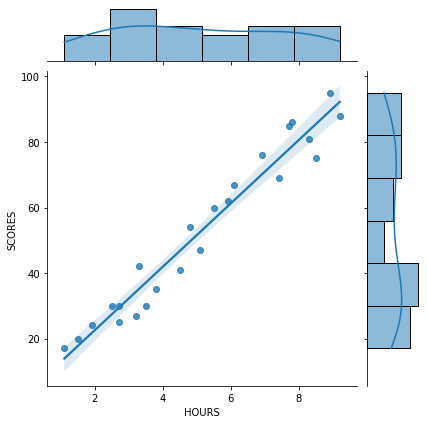

In [7]:
sns.jointplot(df['HOURS'], df['SCORES'], kind = "reg").annotate(stats.pearsonr)
plt.show()

Text(0.5, 1.0, 'Plotting the regression line')

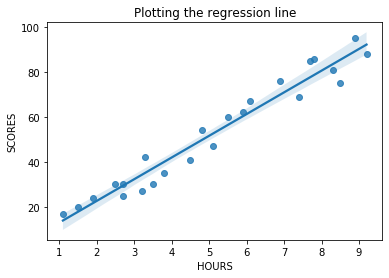

In [9]:
sns.regplot(x="HOURS", y="SCORES", data=df)
plt.title("Plotting the regression line")

In [13]:
#-------SIMPLE LINEAR REGRESSION-------

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(X_test)

y_pred

array([46.12725679, 58.8479643 , 67.93418395, 86.10662325, 48.85312269,
       34.31517125, 15.23410999, 76.11178163])

In [26]:
#Comparing Actual vs Predicted Value

df1 = pd.DataFrame({'Actual': y_test, 'predicted_Scores': y_pred})  
df1

,Actual,predicted_Scores
0,41,46.127257
1,62,58.847964
2,76,67.934184
3,95,86.106623
4,54,48.853123
5,27,34.315171
6,17,15.234110
7,86,76.111782


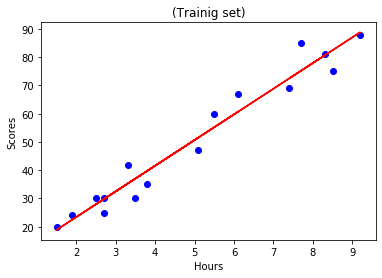

In [31]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [34]:
#Calculating the coeffeciants of the simple linear regression equation: y = C0 + C1.x (C1: Is the Slope, C0:Is the Intercept)

mean_x = np.mean(df['HOURS'])
mean_y = np.mean(df['SCORES'])
num = 0
den = 0
x = list(df['HOURS'])
y = list(df['SCORES'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den
B0 = mean_y - B1*mean_x

In [38]:
df['PREDICTED SCORES'] = B0 + B1*df['HOURS']
df

,HOURS,SCORES,predicted_Scores,PREDICTED SCORES
0,5.1,47,52.588834,52.588834
1,3.2,27,34.215882,34.215882
2,8.5,75,85.466747,85.466747
3,3.5,30,37.116875,37.116875
4,1.5,20,17.776926,17.776926
5,9.2,88,92.235729,92.235729
6,5.5,60,56.456824,56.456824
7,8.3,81,83.532752,83.532752
8,2.7,25,29.380895,29.380895
9,7.7,85,77.730767,77.730767


In [39]:
del df['predicted_Scores']

In [40]:
df

,HOURS,SCORES,PREDICTED SCORES
0,5.1,47,52.588834
1,3.2,27,34.215882
2,8.5,75,85.466747
3,3.5,30,37.116875
4,1.5,20,17.776926
5,9.2,88,92.235729
6,5.5,60,56.456824
7,8.3,81,83.532752
8,2.7,25,29.380895
9,7.7,85,77.730767


[]

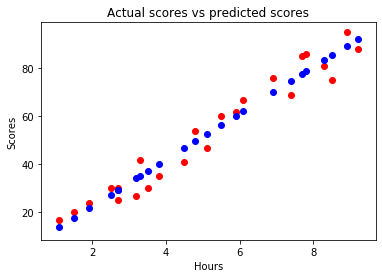

In [42]:
plt.scatter(df['HOURS'], df['SCORES'], c='red', label='Aactual Marks')
plt.scatter(df['HOURS'], df['PREDICTED SCORES'], c='blue', label='Predected Marks')
plt.title('Actual scores vs predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [43]:
y = B0 + B1*9.25
print("Marks scored by the student who study 9.25 hours a day is ",y)

Marks scored by the student who study 9.25 hours a day is  92.7192279679534


In [44]:
# Lets the cut of be 40 marks
cut_off = 40

df['RESULT'] = df['SCORES']>=40
df

,HOURS,SCORES,PREDICTED SCORES,RESULT
0,5.1,47,52.588834,True
1,3.2,27,34.215882,False
2,8.5,75,85.466747,True
3,3.5,30,37.116875,False
4,1.5,20,17.776926,False
5,9.2,88,92.235729,True
6,5.5,60,56.456824,True
7,8.3,81,83.532752,True
8,2.7,25,29.380895,False
9,7.7,85,77.730767,True


In [45]:
df["RESULT"] = df["RESULT"].astype(str)
df.RESULT = df.RESULT.replace({"True": "Passed", "False": "Failed"})
df

,HOURS,SCORES,PREDICTED SCORES,RESULT
0,5.1,47,52.588834,Passed
1,3.2,27,34.215882,Failed
2,8.5,75,85.466747,Passed
3,3.5,30,37.116875,Failed
4,1.5,20,17.776926,Failed
5,9.2,88,92.235729,Passed
6,5.5,60,56.456824,Passed
7,8.3,81,83.532752,Passed
8,2.7,25,29.380895,Failed
9,7.7,85,77.730767,Passed


In [47]:
df["RESULT"].value_counts()

Passed    15
Failed     9
Name: RESULT, dtype: int64

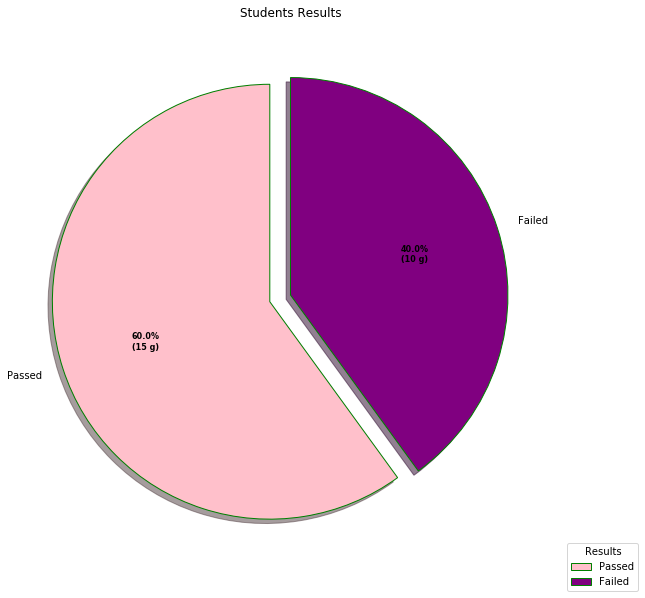

In [49]:
Results = ['Passed', 'Failed']
data = [15,10]
explode = (0.1, 0.0)
colors = ( "pink", "purple")


wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Results, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, Results, 
          title ="Results", 
          loc ="center left", 
          bbox_to_anchor =(1, 0)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Students Results") 
  
# show plot 
plt.show()
